In [1]:
%load_ext autoreload

In [2]:
%autoreload

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from twaibrain.braintorch.models.nnUNet.nnUNetV2_model_loader import get_network_from_plans
from torchinfo import summary
import json

In [4]:
standard_model_json = "cvd_configs/old_nnUNetPlans_a40_standard_pl.json"
m_model_json = "cvd_configs/nnUNetResEncUNetMPlans.json"
l_model_json = "cvd_configs/nnUNetResEncUNetLPlans.json"

model_configs = []
for model_json in [standard_model_json, m_model_json, l_model_json]:
    with open(model_json) as f:
        d = json.load(f)
    model_configs.append(d)

In [23]:
dims = ['2d', '3d_fullres']

arch_kwargs_req_import=["conv_op", "norm_op", "dropout_op", "nonlin"]

models = {}

for i, model_config_set in enumerate(model_configs):
    for dims in ['2d', '3d_fullres']:
        config = model_config_set['configurations'][dims]['architecture']
        network_name = config['network_class_name']
        kw_requires_import = config['_kw_requires_import']
        
        print(f"loading model {i}_{network_name}_{dims}")
        
        model = get_network_from_plans(
            arch_class_name=network_name,
            arch_kwargs=config['arch_kwargs'],
            arch_kwargs_req_import=kw_requires_import,
            input_channels=1,
            output_channels=2,
            allow_init=True,
            deep_supervision=True,
        )
        
        models[f"{i}_{network_name}_{dims}"] = model

loading model 0_dynamic_network_architectures.architectures.unet.PlainConvUNet_2d
loading model 0_dynamic_network_architectures.architectures.unet.PlainConvUNet_3d_fullres
loading model 1_dynamic_network_architectures.architectures.unet.ResidualEncoderUNet_2d
loading model 1_dynamic_network_architectures.architectures.unet.ResidualEncoderUNet_3d_fullres
loading model 2_dynamic_network_architectures.architectures.unet.ResidualEncoderUNet_2d
loading model 2_dynamic_network_architectures.architectures.unet.ResidualEncoderUNet_3d_fullres


In [26]:
summary(models["0_dynamic_network_architectures.architectures.unet.PlainConvUNet_3d_fullres"], (1, 1, 56, 256, 256))

Layer (type:depth-idx)                                                 Output Shape              Param #
PlainConvUNet                                                          [1, 2, 56, 256, 256]      --
├─UNetDecoder: 1-1                                                     --                        (recursive)
│    └─PlainConvEncoder: 2-1                                           [1, 32, 56, 256, 256]     --
│    │    └─Sequential: 3-1                                            --                        14,006,112
├─UNetDecoder: 1-2                                                     [1, 2, 56, 256, 256]      14,006,112
│    └─ModuleList: 2-14                                                --                        (recursive)
│    │    └─ConvTranspose3d: 3-2                                       [1, 320, 7, 16, 16]       409,920
│    └─ModuleList: 2-15                                                --                        (recursive)
│    │    └─StackedConvBlocks: 3-3             

In [25]:
summary(models["1_dynamic_network_architectures.architectures.unet.ResidualEncoderUNet_3d_fullres"], (1, 1, 56, 256, 256))

Layer (type:depth-idx)                                                      Output Shape              Param #
ResidualEncoderUNet                                                         [1, 2, 56, 256, 256]      --
├─UNetDecoder: 1-1                                                          --                        (recursive)
│    └─ResidualEncoder: 2-1                                                 [1, 32, 56, 256, 256]     --
│    │    └─StackedConvBlocks: 3-1                                          [1, 32, 56, 256, 256]     384
│    │    └─Sequential: 3-2                                                 --                        90,258,752
├─UNetDecoder: 1-2                                                          [1, 2, 56, 256, 256]      90,259,136
│    └─ModuleList: 2-14                                                     --                        (recursive)
│    │    └─ConvTranspose3d: 3-3                                            [1, 320, 7, 16, 16]       409,920
│    └─Mod

In [27]:
summary(models["2_dynamic_network_architectures.architectures.unet.ResidualEncoderUNet_3d_fullres"], (1, 1, 56, 256, 256))

Layer (type:depth-idx)                                                      Output Shape              Param #
ResidualEncoderUNet                                                         [1, 2, 56, 256, 256]      --
├─UNetDecoder: 1-1                                                          --                        (recursive)
│    └─ResidualEncoder: 2-1                                                 [1, 32, 56, 256, 256]     --
│    │    └─StackedConvBlocks: 3-1                                          [1, 32, 56, 256, 256]     384
│    │    └─Sequential: 3-2                                                 --                        123,447,872
├─UNetDecoder: 1-2                                                          [1, 2, 56, 256, 256]      123,448,256
│    └─ModuleList: 2-17                                                     --                        (recursive)
│    │    └─ConvTranspose3d: 3-3                                            [1, 320, 7, 8, 8]         409,920
│    └─M

In [30]:
summary(models["0_dynamic_network_architectures.architectures.unet.PlainConvUNet_2d"], (8, 1, 256, 256))

Layer (type:depth-idx)                                                 Output Shape              Param #
PlainConvUNet                                                          [8, 2, 256, 256]          --
├─UNetDecoder: 1-1                                                     --                        (recursive)
│    └─PlainConvEncoder: 2-1                                           [8, 32, 256, 256]         --
│    │    └─Sequential: 3-1                                            --                        14,158,944
├─UNetDecoder: 1-2                                                     [8, 2, 256, 256]          14,158,944
│    └─ModuleList: 2-17                                                --                        (recursive)
│    │    └─ConvTranspose2d: 3-2                                       [8, 512, 8, 8]            1,049,088
│    └─ModuleList: 2-18                                                --                        (recursive)
│    │    └─StackedConvBlocks: 3-3           

In [31]:
summary(models["1_dynamic_network_architectures.architectures.unet.ResidualEncoderUNet_2d"], (8, 1, 256, 256))

Layer (type:depth-idx)                                                      Output Shape              Param #
ResidualEncoderUNet                                                         [8, 2, 256, 256]          --
├─UNetDecoder: 1-1                                                          --                        (recursive)
│    └─ResidualEncoder: 2-1                                                 [8, 32, 256, 256]         --
│    │    └─StackedConvBlocks: 3-1                                          [8, 32, 256, 256]         384
│    │    └─Sequential: 3-2                                                 --                        92,110,016
├─UNetDecoder: 1-2                                                          [8, 2, 256, 256]          92,110,400
│    └─ModuleList: 2-17                                                     --                        (recursive)
│    │    └─ConvTranspose2d: 3-3                                            [8, 512, 8, 8]            1,049,088
│    └─M

In [32]:
summary(models["2_dynamic_network_architectures.architectures.unet.ResidualEncoderUNet_2d"], (8, 1, 256, 256))

Layer (type:depth-idx)                                                      Output Shape              Param #
ResidualEncoderUNet                                                         [8, 2, 256, 256]          --
├─UNetDecoder: 1-1                                                          --                        (recursive)
│    └─ResidualEncoder: 2-1                                                 [8, 32, 256, 256]         --
│    │    └─StackedConvBlocks: 3-1                                          [8, 32, 256, 256]         384
│    │    └─Sequential: 3-2                                                 --                        92,110,016
├─UNetDecoder: 1-2                                                          [8, 2, 256, 256]          92,110,400
│    └─ModuleList: 2-17                                                     --                        (recursive)
│    │    └─ConvTranspose2d: 3-3                                            [8, 512, 8, 8]            1,049,088
│    └─M

In [33]:
data_2d = torch.rand(1, 1, 256, 256)

/home/s2208943/miniconda3/envs/twaibrain/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/s2208943/miniconda3/envs/twaibrain/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/s2208943/miniconda3/envs/twaibrain/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/s2208943/miniconda3/envs/twaibrain/lib/py

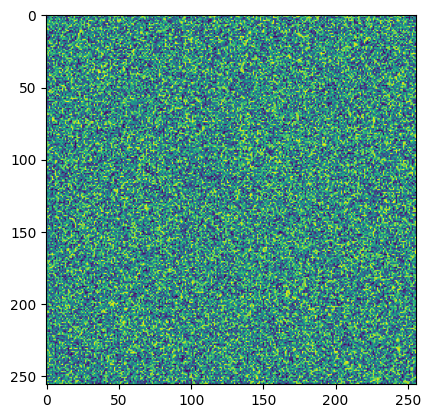

In [35]:
plt.imshow(data_2d.squeeze())

In [37]:
with torch.no_grad():
    out = models["0_dynamic_network_architectures.architectures.unet.PlainConvUNet_2d"](data_2d)

In [39]:
len(out)

6

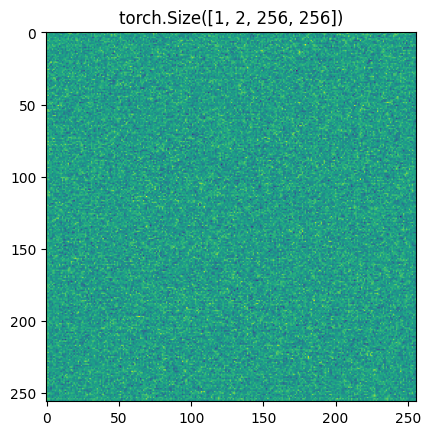

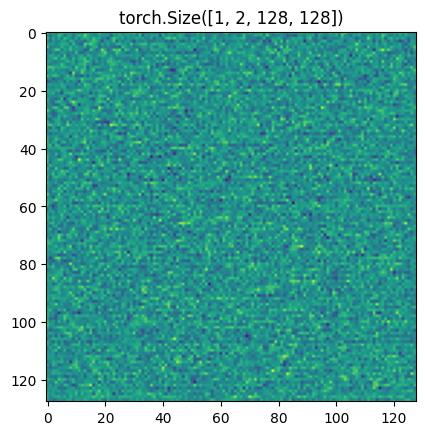

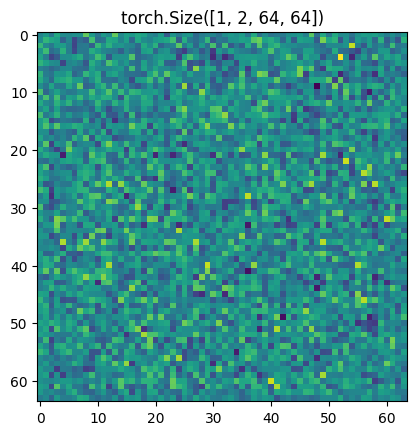

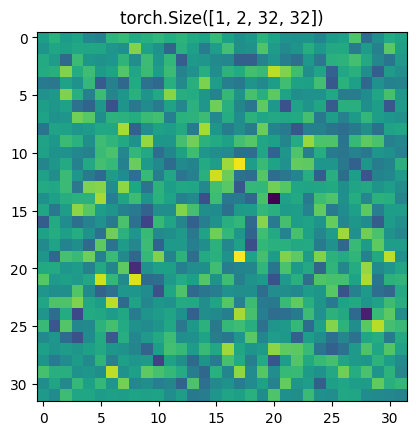

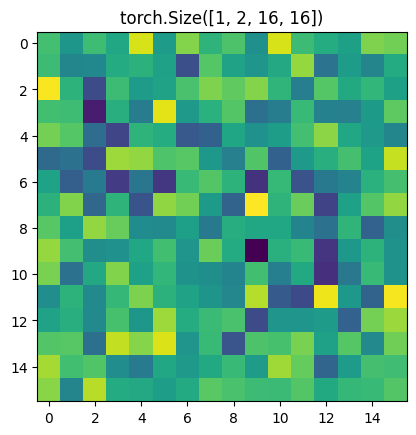

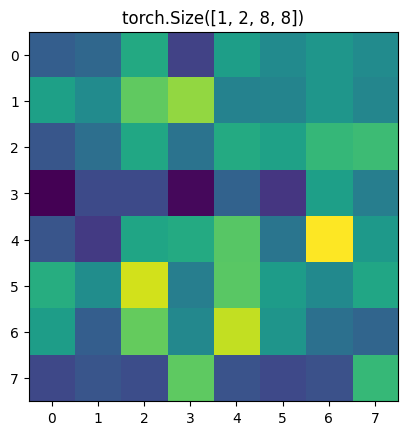

In [43]:
for o in out:
    plt.imshow(o.squeeze()[0])
    plt.title(str(o.shape))
    plt.show()